### В этом мини-проекте мы посчитаем несколько продуктовых метрик и посмотрим, какие распределения могут встретиться на практике.

## Задания 
 1. Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.
 2. Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.
 3. Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.
 4. Проанализируйте CTR с разбивкой по рекламной кампании.
 5. Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости. 
 6. Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления. 
 7. Посчитайте конверсию из клика в покупку.

### Описание данных:
 - ad_id – идентификатор объявления (рекламы)
 - xyz_campaign_id – идентификатор рекламной кампании в базе компании X
 - fb_campaign_id – идентификатор кампании в Facebook
 - age – возрастная группа, которой показывалась реклама
 - gender – пол тех, кому показывалась реклама
 - interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)
 - impressions – число показов
 - clicks – число кликов
 - spent – сумма, которую компания потратила на показ объявления 
 - total_conversion – количество людей, которые заинтересовались продуктом после просмотра рекламы
 - approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as ss 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(12,6)},style='whitegrid')

In [4]:
df = pd.read_csv('C:/Users/рома/Downloads/conversion.csv')
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


# 1
Загрузите данные, проверьте число наблюдений и столбцов, типы данных, наличие пропущенных значений, какие уникальные значения встречаются.

In [6]:
df.shape

(1143, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [6]:
df.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [7]:
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

# 2
Постройте график распределения числа показов (Impressions) для каждой рекламы, прологарифмировав значения.

In [8]:
df.groupby('fb_campaign_id',as_index=False).agg({'Impressions':'sum'})

,fb_campaign_id,Impressions
0,103916,7350
1,103917,17861
2,103920,693
3,103928,8392
4,103929,1915
...,...,...
686,179977,1129773
687,179978,637549
688,179979,151531
689,179981,790253


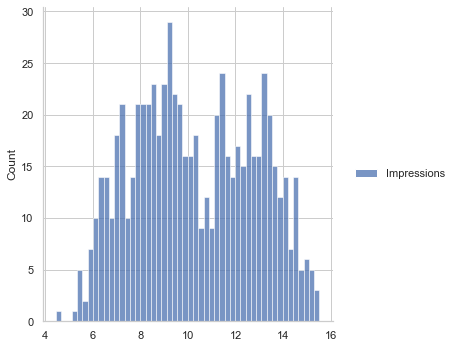

In [11]:
sns.displot(np.log(df.groupby('fb_campaign_id').agg({'Impressions':'sum'})), kde = False,bins = 50);

# 3
Создайте новую колонку c CTR. Посмотрите на описательные статистики и распределение.

In [12]:
df['CTR'] = df.Clicks/df.Impressions
df['CTR'].describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: CTR, dtype: float64

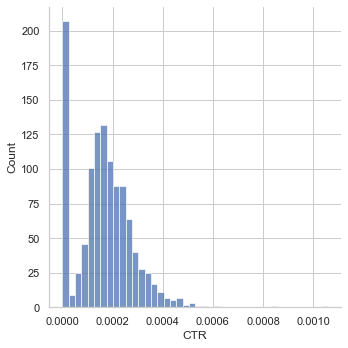

In [15]:
sns.displot(df.CTR);

# 4
Проанализируйте CTR с разбивкой по рекламной кампании.

In [16]:
df.iloc[df.CTR.idxmax()]

ad_id                    738637
xyz_campaign_id             936
fb_campaign_id           109857
age                       45-49
gender                        F
interest                     24
Impressions                 944
Clicks                        1
Spent                      1.42
Total_Conversion              1
Approved_Conversion           0
CTR                    0.001059
Name: 150, dtype: object

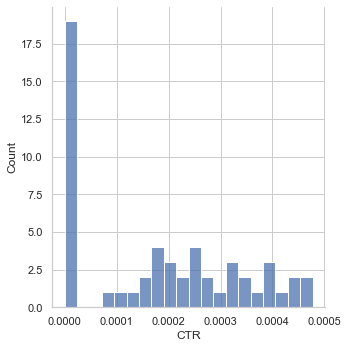

In [21]:
sns.displot(df.query('xyz_campaign_id==916').CTR, bins = 20, kde=False);

# 5
Посчитайте стоимость за клик пользователя по объявлению (CPC). Изучите полученные значения, используя меры центральной тенденции и меры изменчивости.

In [22]:
df['CPC'] = df.Spent/df.Clicks
df.CPC.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: CPC, dtype: float64

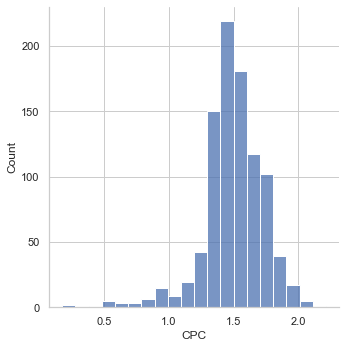

In [23]:
sns.displot(df.dropna().CPC, bins=20, kde=False);

In [24]:
ss.iqr(df.CPC,nan_policy='omit')

0.2543636990499998

# 6
Визуализируйте CPC с разбивкой по полу пользователей, которым были показаны объявления.

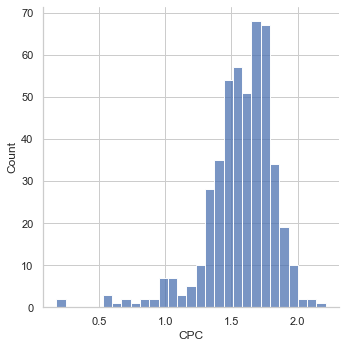

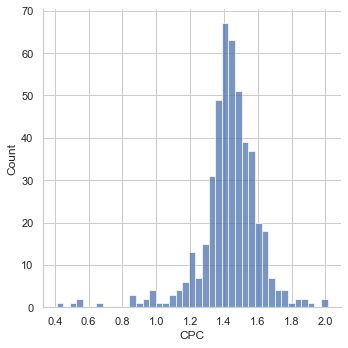

In [25]:
sns.displot(df.query('gender=="M"').CPC.dropna())
sns.displot(df.query('gender=="F"').CPC.dropna())

# 7 
Посчитайте конверсию из клика в покупку.

In [26]:
df['cr_app'] = ((df.Approved_Conversion/df.Clicks).mul(100))
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,cr_app
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1,0.000136,1.430000,100.000000
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0,0.000112,0.910000,0.000000
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0,0.000000,NaN,NaN
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0,0.000235,1.250000,0.000000
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1,0.000242,1.290000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2,0.000223,1.421389,0.793651
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0,0.000188,1.449000,0.000000
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0,0.000185,1.438929,0.000000
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710001,8,2,0.000171,1.471926,1.481481
